In [2]:
# 載入必要的MODULE
import requests, json, datetime
import pandas as pd


In [3]:
!pip install jieba

  Stored in directory: C:\Users\Shane\AppData\Local\pip\Cache\wheels\af\e4\8e\5fdd61a6b45032936b8f9ae2044ab33e61577950ce8e0dec29
Successfully built jieba


In [5]:
!pip install wordcloud

In [3]:

# 選新聞
# 抓API數量並且標示500筆
r = requests.get('https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNewsByBucketGroup&groupid=Game_tw&len=500')
# r = requests.get('https://www.cupoy.com/MixNewsAction.do?op=chkExtendFlagItems')
# r = requests.get('https://www.cupoy.com/MixNewsAction.do?op=chkExtendFlagItems')

# 把DATA轉換成JSON格式
data = json.loads(r.text)

data

{'items': [{'itemuid': '68747470733A2F2F6368696E6573652E656E6761646765742E636F6D2F736F6E792D706C617973746174696F6E2D352D73616C65732D706173732D31302D6D696C6C696F6E2D3133353435383834322E68746D6C',
   'newsid': '0000017AED659F5068747470733A2F2F6368696E6573652E656E6761646765742E636F6D2F736F6E792D706C617973746174696F6E2D352D73616C65732D706173732D31302D6D696C6C696F6E2D3133353435383834322E68746D6C',
   'itemsrctype': 2,
   'ctype': 5,
   'title': 'PlayStation 5 銷量極速突破一千萬臺，你成功買到了沒？',
   'description': '次世代遊戲主機 PlayStation 5 自 2020 年 11 月 12 日正式面世以來，至今才短短 8 個月左右的時間，就已經錄得了超過 1,000 萬臺的銷售量。據 Sony 所說，這也是他們 SIE 史上銷售最快的主機，持續超越前代主機 PS4 的同期銷量。',
   'thumbimgurl': 'https://s.yimg.com/os/creatr-uploaded-images/2020-09/d9cec340-f8a5-11ea-b5be-3a46caf29a81',
   'linkurl': 'https://chinese.engadget.com/sony-playstation-5-sales-pass-10-million-135458842.html',
   'nationID': 'TW',
   'publishtime': 1627480498000,
   'bucketids': ['GameInformation_tw'],
   'bucketgrpids': ['GamePlayer_tw', 'Game_tw'],
   'met

In [4]:

# 提取每一筆ITEM資料的不同內容:
title = []
url = []
count = 0

#把連結和標題送進陣列

for item in data['items']:
    count +=1
    url.append(item.get('linkurl'))
    title.append(item.get('title'))


df = pd.DataFrame(columns=['Title','Link'])
df['Link'] = url
df['Title'] = title

df.head()





,Title,Link
0,PlayStation 5 銷量極速突破一千萬臺，你成功買到了沒？,https://chinese.engadget.com/sony-playstation-...
1,React Tetris 重現經典的俄羅斯方塊，免安裝！打開瀏覽器就能玩！ – 重灌狂人,https://briian.com/76768/
2,PS5 全球銷售突破 1000 萬臺 已成為 SIE 史上銷售速度最快遊戲主機 - 電腦王阿達,https://www.kocpc.com.tw/archives/395700
3,即便還是很多玩家買不到，但 PS5 已突破 PS4 紀錄成 SIE 最快銷售破千萬臺的遊戲機...,https://www.cool3c.com/article/163562
4,【2021 六都電競】特戰英豪臺北八強： 各種輕鬆炸魚，真正的考驗準決賽才開始！,https://www.upmedia.mg/news_info.php?SerialNo=...


In [5]:
df.to_csv('data.csv', encoding='utf_8_sig',index=False)

In [6]:
#讀csv檔
DATA_CSV = pd.read_csv('data.csv', encoding='utf-8')
web = pd.DataFrame(DATA_CSV['Link'].value_counts()).reset_index()
web.columns=['Link','num']
web


,Link,num
0,https://www.cool3c.com/article/163131,1
1,https://www.mobile01.com/topicdetail.php?f=401...,1
2,https://www.mobile01.com/topicdetail.php?f=282...,1
3,https://www.cool3c.com/article/161618,1
4,https://unwire.hk/2021/06/08/switch-pro-pics/g...,1
...,...,...
495,https://www.upmedia.mg/news_info.php?SerialNo=...,1
496,https://www.gamebase.com.tw/news/topic/99431448/,1
497,https://applealmond.com/?p=99303,1
498,https://www.cool3c.com/article/163260,1


In [7]:
#引入畫圖的套件
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Shane\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


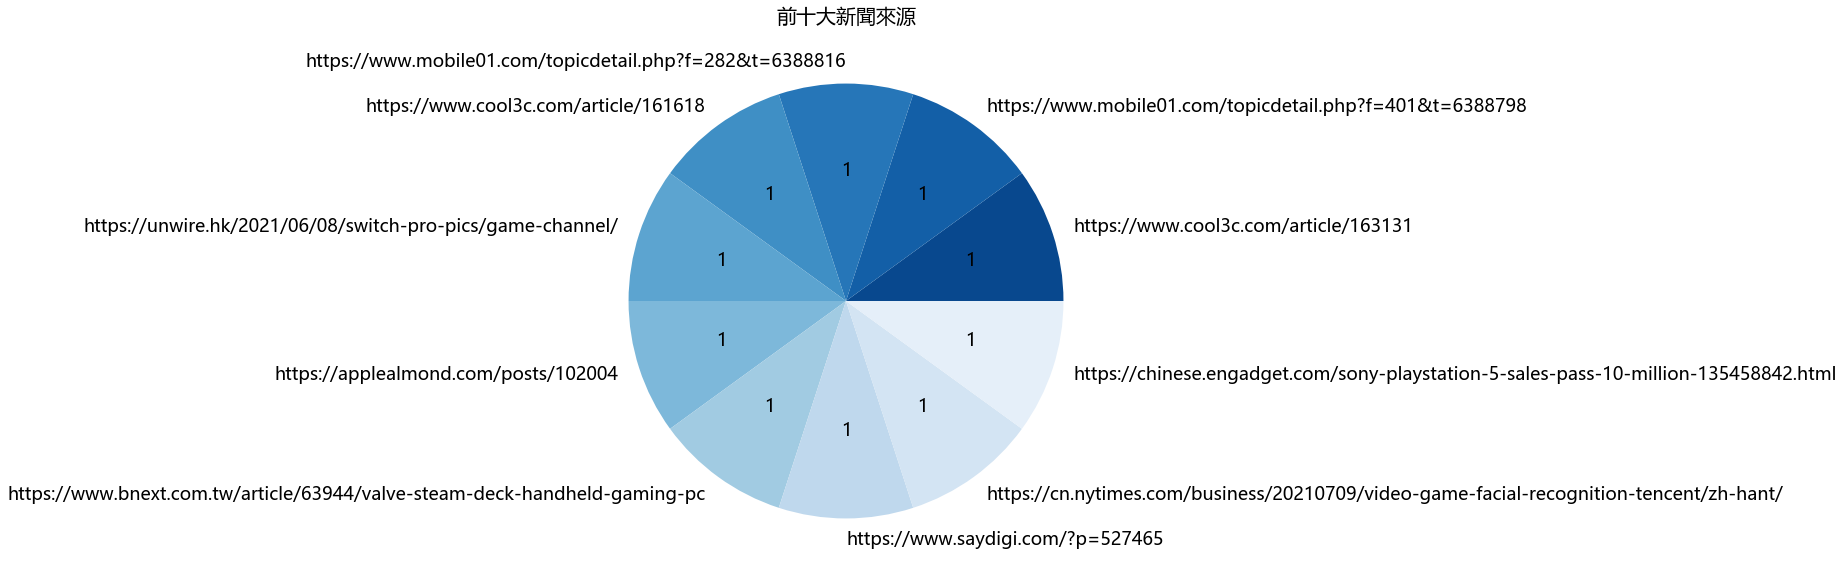

In [8]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        # 同時顯示數值和占比
        return '{v:d}'.format(v=val)
    return my_autopct

#開始畫圖
color = sns.color_palette("Blues_r",10)
plt.figure(figsize=(20, 10))
plt.pie(web[0:10]['num'], labels=web[0:10]['Link'], autopct=make_autopct(web[0:10]['num']),colors=color,textprops ={'fontsize':18})
#plt.legend(fontsize=12,loc=u'upper left')
plt.title(u'前十大新聞來源',fontsize=20)
plt.show()